# Imports

In [8]:
import pandas as pd 
import numpy as np
import requests
import io
import re
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files


# Load Data

In [2]:
BASE_URL = "https://docs.google.com/spreadsheets/d/1VpLXByvbTfbgupDNWcUaBxdk72cW9FRExs0AgRVaF1g/export?format=csv&"
URL_PARTICIPANTS = BASE_URL+"gid=611260429"
URL_POSTURES = BASE_URL+"gid=961690077"
content_participants = requests.get(URL_PARTICIPANTS, verify=False).content
content_postures = requests.get(URL_POSTURES, verify=False).content
df_participants = pd.read_csv(io.StringIO(content_participants.decode('utf-8'))) 
df_postures = pd.read_csv(io.StringIO(content_postures.decode('utf-8'))) 
plt.rcParams['figure.dpi'] = 100

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

In [ ]:
df_participants.head(1)

,ParticipantID,Age,Gender,DominantHand,AvgTimeSpent,WordsPerMinute,WordCount,Errors,TimeTakenS,TimeTakenM,MeanError,totalwords,time,sec
0,participant_1,27.0,Male,Right,10.0,57.0,89.0,15.0,94.0,1.561404,9.606742,104.0,1.561404,93.684211


In [ ]:
df_postures.head(1)

,ParticipantID,Comfort_Below_Left_Fist_0,Preference_Below_Left_Fist_0,Comfort_Below_Right_Fist_0,Preference_Below_Right_Fist_0,Comfort_Below_Left_Fist_90,Preference_Below_Left_Fist_90,Comfort_Below_Right_Fist_90,Preference_Below_Right_Fist_90,Comfort_Below_Left_Fist_180,Preference_Below_Left_Fist_180,Comfort_Below_Right_Fist_180,Preference_Below_Right_Fist_180,Comfort_Below_Left_Palm_0,Preference_Below_Left_Palm_0,Comfort_Below_Right_Palm_0,Preference_Below_Right_Palm_0,Comfort_Below_Left_Palm_90,Preference_Below_Left_Palm_90,Comfort_Below_Right_Palm_90,Preference_Below_Right_Palm_90,Comfort_Below_Left_Palm_180,Preference_Below_Left_Palm_180,Comfort_Below_Right_Palm_180,Preference_Below_Right_Palm_180,Comfort_On_Left_Fist_0,Preference_On_Left_Fist_0,Comfort_On_Right_Fist_0,Preference_On_Right_Fist_0,Comfort_On_Left_Fist_90,Preference_On_Left_Fist_90,Comfort_On_Right_Fist_90,Preference_On_Right_Fist_90,Comfort_On_Left_Fist_180,Preference_On_Left_Fist_180,Comfort_On_Right_Fist_180,Preference_On_Right_Fist_180,Comfort_On_Left_Palm_0,Preference_On_Left_Palm_0,Comfort_On_Right_Palm_0,Preference_On_Right_Palm_0,Comfort_On_Left_Palm_90,Preference_On_Left_Palm_90,Comfort_On_Right_Palm_90,Preference_On_Right_Palm_90,Comfort_On_Left_Palm_180,Preference_On_Left_Palm_180,Comfort_On_Right_Palm_180,Preference_On_Right_Palm_180,Comfort_Beside_Left_Fist_0,Preference_Beside_Left_Fist_0,Comfort_Beside_Right_Fist_0,Preference_Beside_Right_Fist_0,Comfort_Beside_Left_Fist_90,Preference_Beside_Left_Fist_90,Comfort_Beside_Right_Fist_90,Preference_Beside_Right_Fist_90,Comfort_Beside_Left_Fist_180,Preference_Beside_Left_Fist_180,Comfort_Beside_Right_Fist_180,Preference_Beside_Right_Fist_180,Comfort_Beside_Left_Palm_0,Preference_Beside_Left_Palm_0,Comfort_Beside_Right_Palm_0,Preference_Beside_Right_Palm_0,Comfort_Beside_Left_Palm_90,Preference_Beside_Left_Palm_90,Comfort_Beside_Right_Palm_90,Preference_Beside_Right_Palm_90,Comfort_Beside_Left_Palm_180,Preference_Beside_Left_Palm_180,Comfort_Beside_Right_Palm_180,Preference_Beside_Right_Palm_180
0,participant_1,3,2,4,4,2,2,4,4,1,1,2,2,3,3,5,5,3,3,4,4,1,1,2,2,2,2,4,4,1,1,4,4,1,1,2,2,3,3,4,4,2,2,4,4,1,1,1,1,2,2,3,3,2,2,4,4,1,1,1,1,3,3,4,4,3,3,4,4,1,1,1,1


# Analysis

## Participants

In [ ]:
# GENDER DISTRIBUTION
df_participants.Gender.value_counts()

Male      20
Female    10
Name: Gender, dtype: int64

In [ ]:
# AVERAGE AGE
print("MEAN: ",df_participants["Age"].mean())
print("STD: ",df_participants["Age"].std())

MEAN:  24.566666666666666
STD:  2.4023455970813385


In [ ]:
# AVERAGE USAGE
print("MEAN: ",df_participants["AvgTimeSpent"].mean())
print("STD: ",df_participants["AvgTimeSpent"].std())

MEAN:  7.0
STD:  3.723179953415795


In [ ]:
# AVERAGE TYPING SPEED
print("MEAN: ",df_participants["WordsPerMinute"].mean())
print("STD: ",df_participants["WordsPerMinute"].std())

MEAN:  34.9
STD:  9.531617078855561


In [ ]:
# AVERAGE ERROR RATE
print("MEAN: ",df_participants["MeanError"].mean())
print("STD: ",df_participants["MeanError"].std())

MEAN:  5.735205992738709
STD:  2.6533760931418673


## Postures

In [ ]:
pd.melt(df_postures, id_vars=['ParticipantID'], var_name='posture', value_name='score').tail()

,ParticipantID,posture,score
2155,participant_26,Preference_Beside_Right_Palm_180,2
2156,participant_27,Preference_Beside_Right_Palm_180,4
2157,participant_28,Preference_Beside_Right_Palm_180,2
2158,participant_29,Preference_Beside_Right_Palm_180,1
2159,participant_30,Preference_Beside_Right_Palm_180,3


In [ ]:
# creating a blank series 
surface_list = pd.Series([]) 
orientation_list = pd.Series([]) 
form_list = pd.Series([]) 
dexterity_list = pd.Series([]) 
rating_list = pd.Series([]) 

df_postures_stats = pd.melt(df_postures, id_vars=['ParticipantID'], var_name='posture', value_name='score')
participant_handedness={
    "participant_1":"Right",
    "participant_2":"Right",
    "participant_3":"Right",
    "participant_4":"Left",
    "participant_5":"Right",
    "participant_6":"Left",
    "participant_7":"Right",
    "participant_8":"Left",
    "participant_9":"Right",
    "participant_10":"Right",
    "participant_11":"Right",
    "participant_12":"Right",
    "participant_13":"Right",
    "participant_14":"Right",
    "participant_15":"Right",
    "participant_16":"Right",
    "participant_17":"Right",
    "participant_18":"Left",
    "participant_19":"Left",
    "participant_20":"Right",
    "participant_21":"Right",
    "participant_22":"Right",
    "participant_23":"Right",
    "participant_24":"Right",
    "participant_25":"Right",
    "participant_26":"Right",
    "participant_27":"Right",
    "participant_28":"Right",
    "participant_29":"Right",
    "participant_30":"Right",
}
for i in range(len(df_postures_stats)): 
  independent_variable = df_postures_stats["posture"][i].split("_")
  rating_list[i] = independent_variable[0]
  surface_list[i] = independent_variable[1]
#   print(df_postures_stats["ParticipantID"][i])
  dexterity_list[i] = "Dominant" if independent_variable[2] == participant_handedness[df_postures_stats["ParticipantID"][i]] else "Non Dominant"
  form_list[i] = "Close" if independent_variable[3] == "Fist" else "Open"
  orientation_list[i] = independent_variable[4]

  
df_postures_stats.insert(3, "surface", surface_list)
df_postures_stats.insert(4, "dexterity", dexterity_list)
df_postures_stats.insert(5, "form", form_list)
df_postures_stats.insert(6, "orientation", orientation_list)
df_postures_stats.insert(7, "rating", rating_list)
df_postures_stats["posture"] = df_postures_stats["posture"].map(lambda x: x.lstrip('Comfort_').lstrip('Preference_')) #[i.replace("Comfort_|Preference_","") for i in df_postures_stats["posture"]]
df_postures_stats.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify

,ParticipantID,posture,score,surface,dexterity,form,orientation,rating
0,participant_1,Below_Left_Fist_0,3,Below,Non Dominant,Close,0,Comfort
1,participant_2,Below_Left_Fist_0,4,Below,Non Dominant,Close,0,Comfort
2,participant_3,Below_Left_Fist_0,4,Below,Non Dominant,Close,0,Comfort
3,participant_4,Below_Left_Fist_0,4,Below,Dominant,Close,0,Comfort
4,participant_5,Below_Left_Fist_0,2,Below,Non Dominant,Close,0,Comfort


In [ ]:
df_postures_stats_melted = pd.melt(df_postures_stats,id_vars=["ParticipantID","surface","score","orientation","dexterity","form", "rating"]).groupby("value").apply(lambda x: (x.sort_values('score', ascending=False)))
print(df_postures_stats_melted.head())
# print(df_orientation_postures_stats.head())
# print(df_handform_postures_stats.head())
# print(df_dexterity_postures_stats.head())


                       ParticipantID surface  ...  variable              value
value                                         ...                             
Below_Left_Fist_0 20  participant_21   Below  ...   posture  Below_Left_Fist_0
                  12  participant_13   Below  ...   posture  Below_Left_Fist_0
                  42  participant_13   Below  ...   posture  Below_Left_Fist_0
                  35   participant_6   Below  ...   posture  Below_Left_Fist_0
                  45  participant_16   Below  ...   posture  Below_Left_Fist_0

[5 rows x 9 columns]


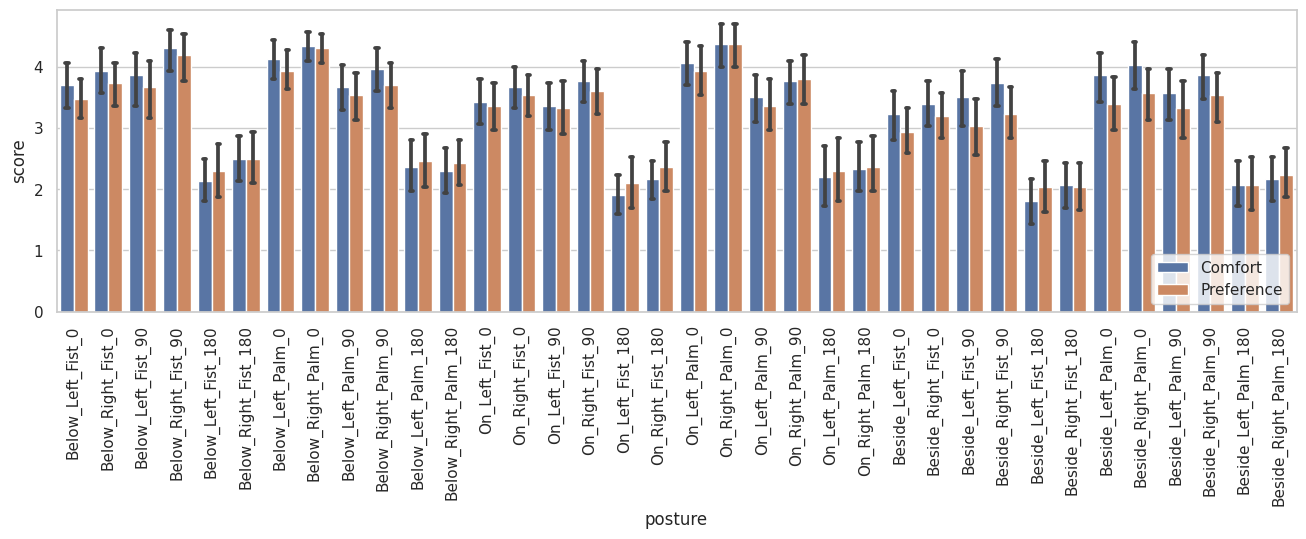

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x="posture", y="score", hue="rating", data=df_postures_stats, capsize=0.1)
ax.legend(loc='lower right')

comfort 
             score
surface          
Below    3.433333
Beside   3.108333
On       3.211111
-----
preference 
             score
surface          
Below    3.352778
Beside   2.883333
On       3.202778


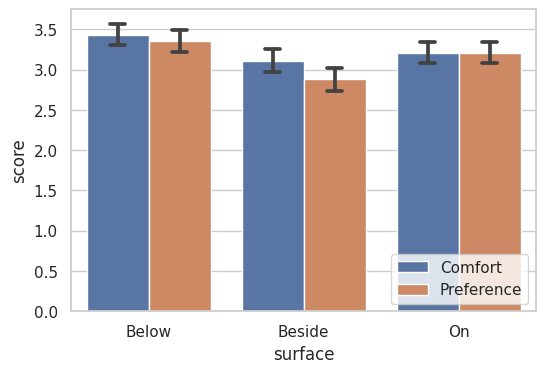

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
ax = sns.barplot(x="surface", y="score", hue="rating", data=df_postures_stats, capsize=0.1, order= ["Below", "Beside", "On"])
ax.legend(loc='lower right')
print("comfort \n", df_postures_stats.loc[df_postures_stats["rating"]=="Comfort"].groupby("surface").mean())
print("-----")
print("preference \n", df_postures_stats.loc[df_postures_stats["rating"]=="Preference"].groupby("surface").mean())

comfort 
                 score
orientation          
0            3.847222
180          2.166667
90           3.738889
-----
preference 
                 score
orientation          
0            3.644444
180          2.266667
90           3.527778


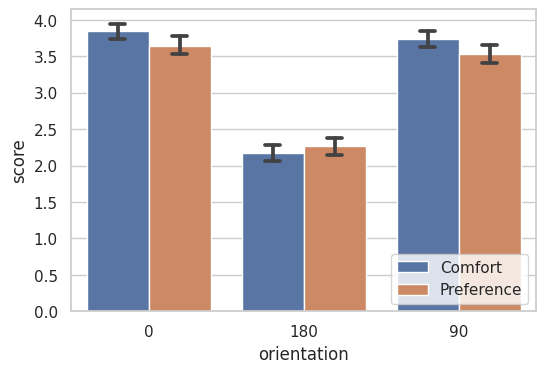

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
ax = sns.barplot(x="orientation", y="score", hue="rating", data=df_postures_stats, capsize=0.1)
ax.legend(loc='lower right')
print("comfort \n", df_postures_stats.loc[df_postures_stats["rating"]=="Comfort"].groupby("orientation").mean())
print("-----")
print("preference \n", df_postures_stats.loc[df_postures_stats["rating"]=="Preference"].groupby("orientation").mean())

comfort 
                  score
dexterity             
Dominant      3.329630
Non Dominant  3.172222
-----
preference 
                  score
dexterity             
Dominant      3.218519
Non Dominant  3.074074


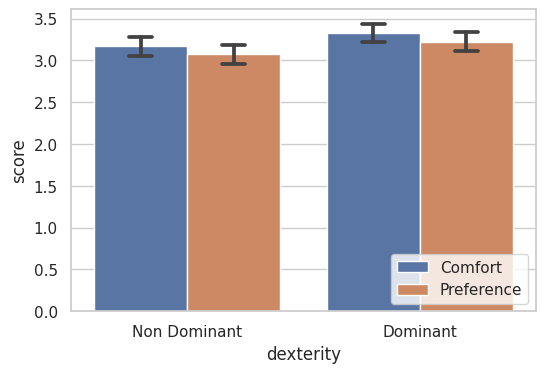

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
ax = sns.barplot(x="dexterity", y="score", hue="rating", data=df_postures_stats, capsize=0.1)
ax.legend(loc='lower right')
print("comfort \n", df_postures_stats.loc[df_postures_stats["rating"]=="Comfort"].groupby("dexterity").mean())
print("-----")
print("preference \n", df_postures_stats.loc[df_postures_stats["rating"]=="Preference"].groupby("dexterity").mean())

comfort 
           score
form           
Close  3.137037
Open   3.364815
-----
preference 
           score
form           
Close  3.035185
Open   3.257407


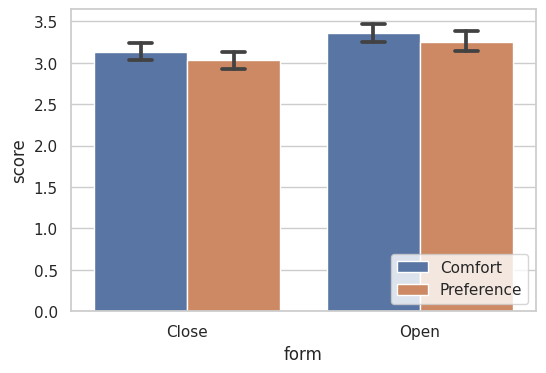

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
ax = sns.barplot(x="form", y="score", hue="rating", data=df_postures_stats, capsize=0.1)
ax.legend(loc='lower right')
print("comfort \n", df_postures_stats.loc[df_postures_stats["rating"]=="Comfort"].groupby("form").mean())
print("-----")
print("preference \n", df_postures_stats.loc[df_postures_stats["rating"]=="Preference"].groupby("form").mean())

**To do**

- ~Compare postures across different dimensions (SURFACE, WRIST_ORIENTATION, HAND_FORM & DEXTERITY)~
- Give design recomendations based on above^^

In [ ]:
# "Preference_Beside_Right_Fist_Side"
# df_postures_stats.loc[(df_postures_stats["ParticipantID"] == "participant_4") & (df_postures_stats["posture"] == "Beside_Right_Fist_90")]
# df_postures_stats.head()
df_postures_stats.loc[(df_postures_stats["score"].isnull())]

,ParticipantID,posture,score,surface,dexterity,form,orientation,rating


<Figure size 600x400 with 0 Axes>

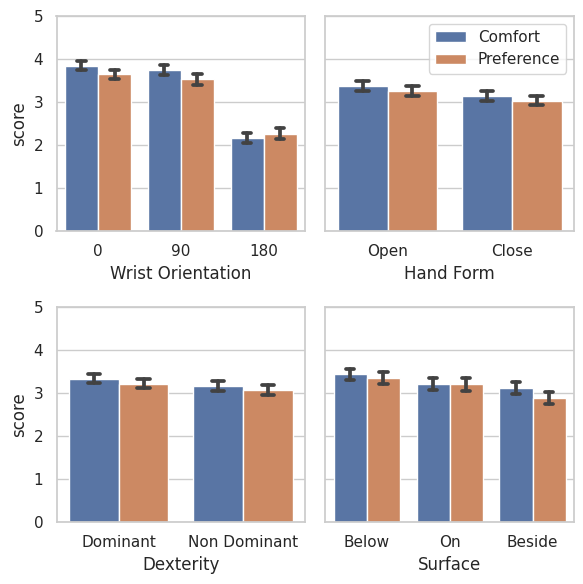

In [ ]:
sns.set(style="whitegrid")
ff = plt.figure()
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(6, 6), sharey=True)
# sns.despine(top=True, right=True)
# sns.set_style("whitegrid", {'grid.linestyle': '--'})

# Generate a random univariate dataset
# d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
# sns.barplot(x="form", y="score", hue="rating", data=df_postures_stats, capsize=0.1, ax=axes[0, 0])
ax1 = sns.barplot(x="orientation", y="score", hue="rating", data=df_postures_stats, capsize=0.1, ax=axes[0, 0], order=["0","90", "180"])
ax2 = sns.barplot(x="form", y="score", hue="rating", data=df_postures_stats, capsize=0.1, ax=axes[0, 1], order=["Open","Close"])
ax3 = sns.barplot(x="dexterity", y="score", hue="rating", data=df_postures_stats, capsize=0.1, ax=axes[1, 0], order=["Dominant","Non Dominant"])
ax4 = sns.barplot(x="surface", y="score", hue="rating", data=df_postures_stats, capsize=0.1, ax=axes[1, 1], order=["Below","On", "Beside"])

ax1.get_legend().set_visible(False)
ax2.get_legend().set_visible(False)
ax3.get_legend().set_visible(False)
ax4.get_legend().set_visible(False)
ax2.set_ylabel('') 
ax4.set_ylabel('') 

ax2.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1)

ax1.set_xlabel('Wrist Orientation') 
ax2.set_xlabel('Hand Form') 
ax3.set_xlabel('Dexterity') 
ax4.set_xlabel('Surface') 

plt.setp(axes, yticks=[0,1,2,3,4,5])
plt.tight_layout()
f.savefig("study_1.pdf", bbox_inches='tight')

In [ ]:
plt.savefig('save_as_a_png.pdf')
plt.close()

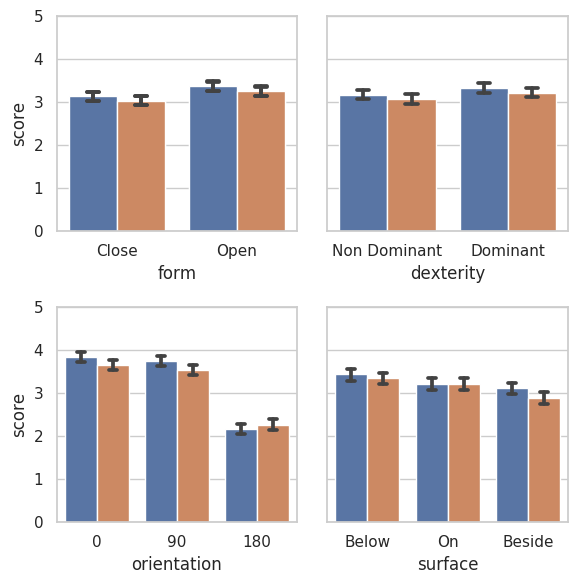

In [ ]:
sns.set(style="whitegrid")

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(6, 6), sharey=True)
# sns.despine(top=True, right=True)
# sns.set_style("whitegrid", {'grid.linestyle': '--'})

# Generate a random univariate dataset
# d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.barplot(x="form", y="score", hue="rating", data=df_postures_stats, capsize=0.1, ax=axes[0, 0])
ax1 = sns.barplot(x="form", y="score", hue="rating", data=df_postures_stats, capsize=0.1, ax=axes[0, 0])
ax2 = sns.barplot(x="dexterity", y="score", hue="rating", data=df_postures_stats, capsize=0.1, ax=axes[0, 1])
ax3 = sns.barplot(x="orientation", y="score", hue="rating", data=df_postures_stats, capsize=0.1, ax=axes[1, 0], order=["0","90", "180"])
ax4 = sns.barplot(x="surface", y="score", hue="rating", data=df_postures_stats, capsize=0.1, ax=axes[1, 1])

ax1.get_legend().set_visible(False)
ax2.get_legend().set_visible(False)
ax3.get_legend().set_visible(False)
ax4.get_legend().set_visible(False)
ax2.set_ylabel('') 
ax4.set_ylabel('') 

plt.setp(axes, yticks=[0,1,2,3,4,5])
plt.tight_layout()

In [ ]:
df_postures_stats.to_csv('df_postures_stats.csv') 
files.download('df_postures_stats.csv')

In [ ]:
df_postures_stats['ParticipantID'] = [c.replace("participant_","") for c in df_postures_stats['ParticipantID'].astype(str)]
df_postures_stats.head()

,ParticipantID,posture,score,surface,dexterity,form,orientation,rating
0,1,Below_Left_Fist_0,3,Below,Non Dominant,Close,0,Comfort
1,2,Below_Left_Fist_0,4,Below,Non Dominant,Close,0,Comfort
2,3,Below_Left_Fist_0,4,Below,Non Dominant,Close,0,Comfort
3,4,Below_Left_Fist_0,4,Below,Dominant,Close,0,Comfort
4,5,Below_Left_Fist_0,2,Below,Non Dominant,Close,0,Comfort


In [ ]:
df_postures_stats.head()

,ParticipantID,posture,score,surface,dexterity,form,orientation,rating
0,1,Below_Left_Fist_0,3,Below,Non Dominant,Close,0,Comfort
1,2,Below_Left_Fist_0,4,Below,Non Dominant,Close,0,Comfort
2,3,Below_Left_Fist_0,4,Below,Non Dominant,Close,0,Comfort
3,4,Below_Left_Fist_0,4,Below,Dominant,Close,0,Comfort
4,5,Below_Left_Fist_0,2,Below,Non Dominant,Close,0,Comfort


In [ ]:
columns = ["ParticipantID", "posture","surface","dexterity","form","orientation","comfort_rating","preference_rating"]
df_postures_stats_new = pd.DataFrame(index=range(1080), columns=columns)
df_comfort = df_postures_stats.loc[df_postures_stats["rating"] == "Comfort"]
df_comfort = df_comfort.reset_index()
for i in range(len(df_comfort)):
#   if i == len(df_comfort):
#     break;
  df_postures_stats_new["ParticipantID"][i] = df_comfort["ParticipantID"][i]
  df_postures_stats_new["posture"][i] = df_comfort["posture"][i]
  df_postures_stats_new["surface"][i] = df_comfort["surface"][i]
  df_postures_stats_new["dexterity"][i] = df_comfort["dexterity"][i]
  df_postures_stats_new["form"][i] = df_comfort["form"][i]
  df_postures_stats_new["orientation"][i] = df_comfort["orientation"][i]
  df_postures_stats_new["comfort_rating"][i] = df_comfort["score"][i]
#   df_postures_stats_new["preference_rating"][i] = df_comfort["preference_rating"][i]
#   print(i)

# df_postures_stats_new
# df_comfort

In [ ]:
df_preference = df_postures_stats.loc[df_postures_stats["rating"] == "Preference"]
df_preference = df_preference.reset_index()
df_preference
for i in range(len(df_preference)):
  if df_postures_stats_new["ParticipantID"][i] == df_preference["ParticipantID"][i]:
    df_postures_stats_new["preference_rating"][i] = df_preference["score"][i]
  else:
    print("SHIT")


# df_comfort

In [ ]:
df_postures_stats_new.head()

,ParticipantID,posture,surface,dexterity,form,orientation,comfort_rating,preference_rating
0,1,Below_Left_Fist_0,Below,Non Dominant,Close,0,3,2
1,2,Below_Left_Fist_0,Below,Non Dominant,Close,0,4,4
2,3,Below_Left_Fist_0,Below,Non Dominant,Close,0,4,3
3,4,Below_Left_Fist_0,Below,Dominant,Close,0,4,4
4,5,Below_Left_Fist_0,Below,Non Dominant,Close,0,2,3


In [ ]:
df_postures_stats_new.to_csv('df_postures_stats.csv') 
files.download('df_postures_stats.csv')

In [179]:
BASE_URL = "https://docs.google.com/spreadsheets/d/1mfyxvKLplFKymUail9wq-mqof4XQOwqXAfJ1EcWrtvM/export?format=csv&"
# URL_CM = BASE_URL+"gid=1042617475"
# URL_CM = BASE_URL+"gid=1366440185"
URL_CM = BASE_URL+"gid=92117957"
content_cm = requests.get(URL_CM, verify=False).content
df_cm = pd.read_csv(io.StringIO(content_cm.decode('utf-8'))) 
df_cm.values.shape
cm_arr = np.log(df_cm).values
# cm_arr = np.where(cm_arr=="-inf", 0, cm_arr) 
# cm_arr[cm_arr < 0] = 0
# xticklabels=x_axis_labels, yticklabels=y_axis_labels
data = cm_arr
data[data < 0] = 0
labels = [col for col in df_cm.columns]
# labels

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [180]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    # plt.ColorScale = 'log'

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    # thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    # for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    #     if normalize:
    #         plt.text(j, i, "{:0.4f}".format(cm[i, j]),
    #                  horizontalalignment="center",
    #                  color="white" if cm[i, j] > thresh else "black")
    #     else:
    #         plt.text(j, i, "{:,}".format(cm[i, j]),
    #                  horizontalalignment="center",
    #                  color="white" if cm[i, j] > thresh else "black")


    # plt.tight_layout()
    # plt.xscale('log')
    # plt.yscale('log')
    # plt.yscale("log")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')# \naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

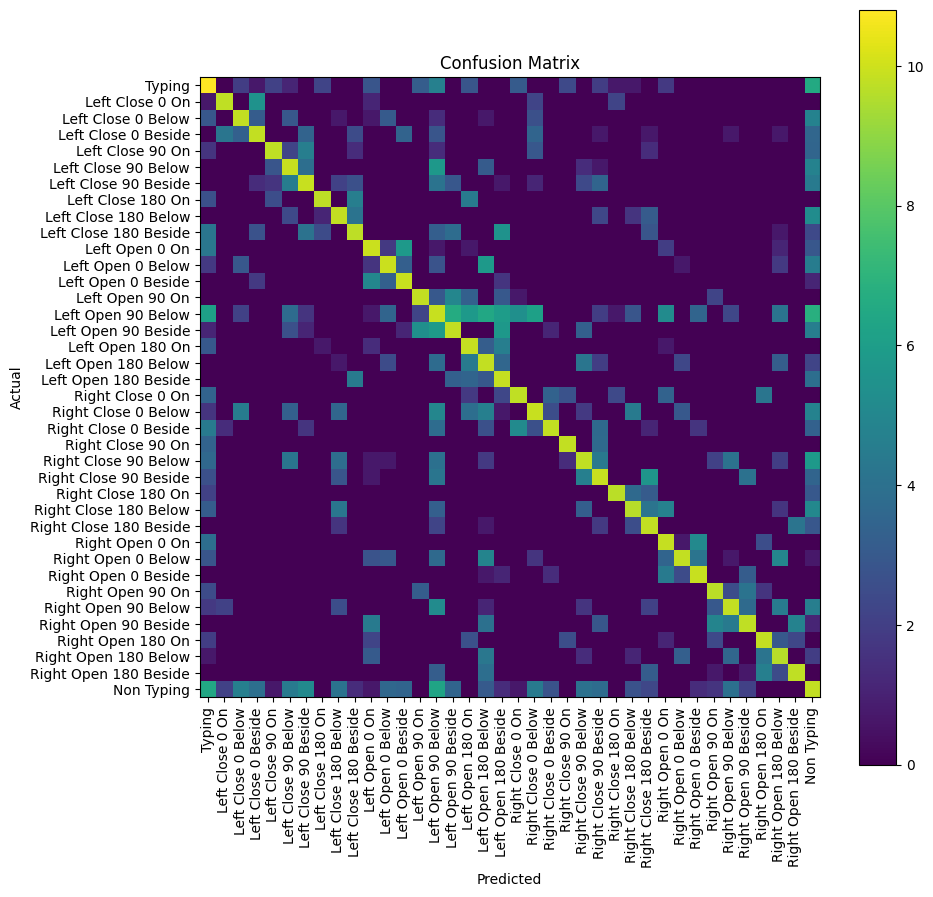

In [181]:
plot_confusion_matrix(cm           = data, 
                      normalize    = False,
                      cmap         = "viridis",
                      target_names  = labels,
                      # target_names  = ["Left Close 0 On","Left Close 0 Beside","Left Close 90 On","Left Close 180 On","Left Close 0 Below","Left Close 90 Beside","Left Close 180 Beside","Left Open 90 On","Left Open 180 On","Left Open 180 Beside","Left Close 90 Below","Left Open 90 Beside","Right Close 0 Below","Left Open 90 Below","non-typing","typing","Left Open 180 Below","Left Open 0 Below","Right Close 90 Below","Left Close 180 Below","Right Close 180 Below","Right Close 0 Beside","Right Close 0 On","Right Close 90 Beside","Right Close 180 Beside","Right Open 90 Below","Right Open 0 On","Right Open 0 Beside","Right Open 0 Below","Right Open 180 Below","Left Open 0 Beside","Left Open 0 On","Right Open 90 Beside","Right Open 90 On","Right Open 180 Beside","Right Open 180 On","Right Close 90 On","Right Close 180 On"],
                      # target_names  = ["Left Close 0 Below","Left Close 0 Beside","Left Close 0 On","Left Close 180 Below","Left Close 180 Beside","Left Close 180 On","Left Close 90 Below","Left Close 90 Beside","Left Close 90 On","Left Open 0 Below","Left Open 0 Beside","Left Open 0 On","Left Open 180 Below","Left Open 180 Beside","Left Open 180 On","Left Open 90 Below","Left Open 90 Beside","Left Open 90 On","Right Close 0 Below","Right Close 0 Beside","Right Close 0 On","Right Close 180 Below","Right Close 180 Beside","Right Close 180 On","Right Close 90 Below","Right Close 90 Beside","Right Close 90 On","Right Open 0 Below","Right Open 0 Beside","Right Open 0 On","Right Open 180 Below","Right Open 180 Beside","Right Open 180 On","Right Open 90 Below","Right Open 90 Beside","Right Open 90 On","non-typing","typing"],
                      # target_names = ["Typing",  "Non Typing",  "Left Close 0 On",  "Left Close 0 Below",  "Left Close 0 Beside",  "Left Close 90 On",  "Left Close 90 Below",  "Left Close 90 Beside",  "Left Close 180 On",  "Left Close 180 Below",  "Left Close 180 Beside",  "Left Open 0 On",  "Left Open 0 Below",  "Left Open 0 Beside",  "Left Open 90 On",  "Left Open 90 Below",  "Left Open 90 Beside",  "Left Open 180 On",  "Left Open 180 Below",  "Left Open 180 Beside",  "Right Close 0 On",  "Right Close 0 Below",  "Right Close 0 Beside",  "Right Close 90 On",  "Right Close 90 Below",  "Right Close 90 Beside",  "Right Close 180 On",  "Right Close 180 Below",  "Right Close 180 Beside",  "Right Open 0 On",  "Right Open 0 Below",  "Right Open 0 Beside",  "Right Open 90 On",  "Right Open 90 Below",  "Right Open 90 Beside",  "Right Open 180 On",  "Right Open 180 Below",  "Right Open 180 Beside"],
                      title        = "Confusion Matrix")

In [187]:
from matplotlib.colors import LogNorm
import math
# cm_arr = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# data = cm_arr/np.sum(cm_arr)
data = cm_arr
plt.figure(figsize=(12, 10))
# data[data < 0] = 0
# data[data < 0] = 0
# data = cm_arr.astype('float') / cm_arr.sum(axis=1)[:, np.newaxis]
# cm.min()
# print(math.log10(0))
# print(math.log10(data.max().max()))
# log_norm = LogNorm(vmin=data.min().min(), vmax=data.max().max())
# cbar_ticks = [math.pow(10, i) for i in range(math.floor(math.log10(data.min().min())), 1+math.ceil(math.log10(data.max().max())))]
m = sns.heatmap(data, cmap='viridis', cbar=True, xticklabels=labels, yticklabels=labels)#, norm=LogNorm(1,10000))#, vmin = 1, vmax=10000) 
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('confusion_matrix.pdf')
plt.close()

In [ ]:
# "https://gist.github.com/nryant/9be09d1e17b1e67a9721998dbb34d8dd"